# KRISS Bi-Weekly Report 
## Bollinger Bands

Hypothesis
1. 종목 : 셀트리온(068270), 맥쿼리인프라(088980)
    - 셀트리온은 높은 변동성을 가진 종목, 맥쿼리는 낮은 변동성을 가진 종목으로 보고 테스팅
2. 기간 : 2022.04.01 - 2022.06.30

### 1. Import Packages

In [23]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import talib as ta

### 2. Stock Data Retreival

In [16]:
df_c = fdr.DataReader(symbol='068270', start='2022-03-04', end='2022-06-30')
df_m = fdr.DataReader(symbol='088980', start='2022-03-04', end='2022-06-30') # 처음 20일은 종가가 이동평균 산출에 쓰이므로 4월 1일부터의 데이터를 보고싶으면 20일 전인 3월 4일로 지정


### 3. Bollinger Bands Data Calculation - MA20, std, upper, lower, %b 

In [17]:
df_c['MA20'] = df_c['Close'].rolling(window=20).mean()      # 20개 종가를 사용해 20일 이동평균 산출
df_c['std'] = df_c['Close'].rolling(window=20).std()     # 20개 종가를 이용해 20일 표준편차 산출
df_c['Upper'] = df_c['MA20'] + (df_c['std'] * 2)           # 상단 볼린저 밴드
df_c['Lower'] = df_c['MA20'] - (df_c['std'] * 2)           # 하단 볼린저 밴드
df_c['%b'] = (df_c['Close'] - df_c['Lower']) / (df_c['Upper'] - df_c['Lower'])  # %b 지표 -> 현재 주가가 밴드를 기준으로 어디쯤에 있는지를 수치로 표현
df_c = df_c[19:]    # 19번째 행까지는 NaN이므로 값이 있는 20번째 행부터 사용
df_c

,Open,High,Low,Close,Volume,Change,MA20,std,Upper,Lower,%b
Date,,,,,,,,,,,
2022-04-01,170000,170500,168500,169000,292355,-0.014577,173325.0,6679.258941,186683.517882,159966.482118,0.338118
2022-04-04,169000,171000,168500,170000,216519,0.005917,173475.0,6562.402881,186599.805763,160350.194237,0.367617
2022-04-05,170500,171500,168500,171500,218135,0.008824,173800.0,6275.264725,186350.529450,161249.470550,0.408370
2022-04-06,170500,172000,168000,168500,323766,-0.017493,173725.0,6331.780742,186388.561485,161061.438515,0.293699
2022-04-07,167500,170000,166000,166500,365033,-0.011869,173400.0,6534.523701,186469.047402,160330.952598,0.236017
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,161000,173000,160500,171500,987698,0.068536,157825.0,5040.037072,167905.074143,147744.925857,1.178318
2022-06-27,173500,179500,171500,175500,923160,0.023324,158900.0,6313.310917,171526.621834,146273.378166,1.157341
2022-06-28,174500,176000,168000,174500,568410,-0.005698,159825.0,7164.009095,174153.018190,145496.981810,1.012109


### 4. Plot Bollinger Chart with %b 

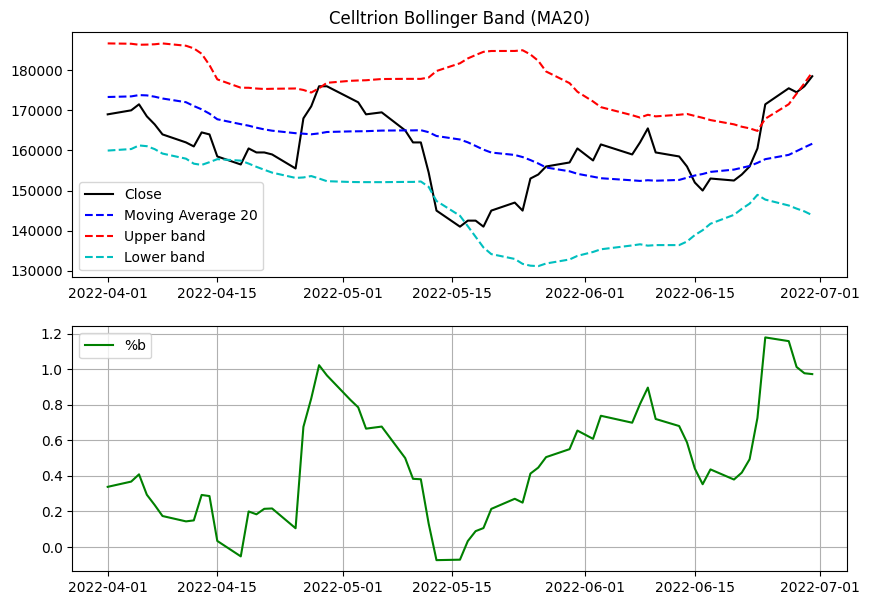

In [21]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)        # 볼린저 밴드 차트를 2행 1열의 그리드에서 1행에 배치
plt.plot(df_c.index, df_c['Close'], 'k', label='Close')
plt.plot(df_c.index, df_c['MA20'], 'b--', label='Moving Average 20')
plt.plot(df_c.index, df_c['Upper'], 'r--', label='Upper band')
plt.plot(df_c.index, df_c['Lower'], 'c--', label='Lower band')
plt.legend(loc='best')
plt.title('Celltrion Bollinger Band (MA20)')

plt.subplot(2, 1, 2)        # %b 차트를 2행 1열의 그리드에서 2행에 배치
plt.plot(df_c.index, df_c['%b'], 'g', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### 5. Plot Golden Cross and Death Cross


장기 이동 평균선과 단기 이동 평균선이 교차하는 부분

**Golden Cross** : 단기 이동 평균선이 중장기 이동 평균선을 아래에서 위로 뚫고 올라가는 현상 강세신호 

**Death Cross** : 단기 이동 평균선이 중장기 이동 평균선을 위에서 아래로 뚫고 내려가는 현상 약세신호

In [42]:
# 셀트리온 단순 이동평균선 - MA20, MA60
dfc = fdr.DataReader(symbol='068270', start='2021-01-01', end='2022-06-30')
dfc['MA20'] = ta.SMA(dfc['Close'], 20)
dfc['MA60'] = ta.SMA(dfc['Close'], 60)
dfc = dfc.dropna()

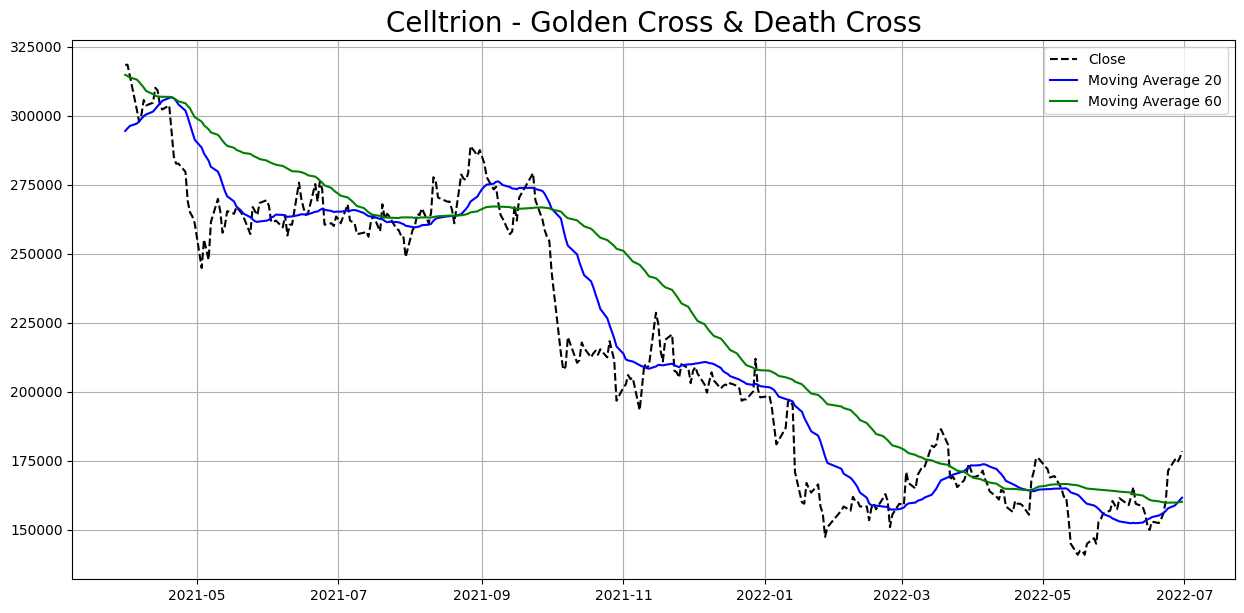

In [62]:
plt.figure(figsize=(15, 7))
plt.plot(dfc.index, dfc['Close'], 'k--', label='Close')
plt.plot(dfc.index, dfc['MA20'], 'b', label='Moving Average 20')
plt.plot(dfc.index, dfc['MA60'], 'g', label='Moving Average 60')
plt.legend(loc='upper right')
plt.title("Celltrion - Golden Cross & Death Cross", {"fontsize" : 20})
plt.grid()
plt.show()

In [44]:
# 맥쿼리인프라 단순 이동평균선 - MA20, MA60
dfm = fdr.DataReader(symbol='088980', start='2021-01-01', end='2022-06-30')
dfm['MA20'] = ta.SMA(dfm['Close'], 20)
dfm['MA60'] = ta.SMA(dfm['Close'], 60)
dfm = dfm.dropna()

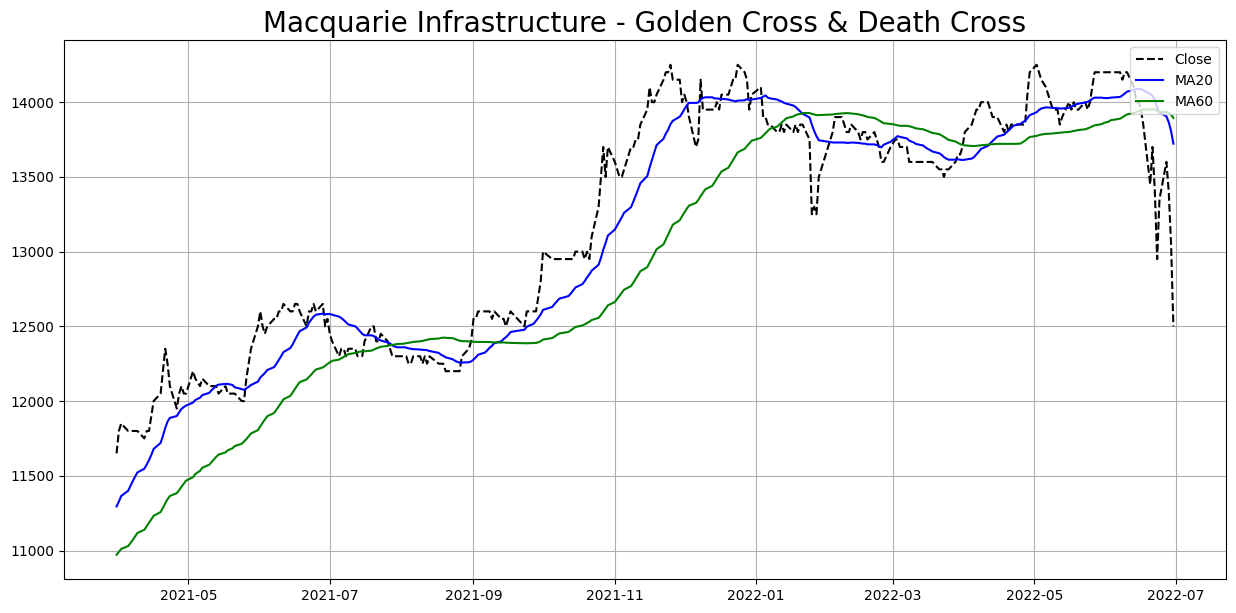

In [63]:
plt.figure(figsize=(15, 7))
plt.plot(dfm.index, dfm['Close'], 'k--', label='Close')
plt.plot(dfm.index, dfm['MA20'], 'b', label='MA20')
plt.plot(dfm.index, dfm['MA60'], 'g', label='MA60')
plt.title("Macquarie Infrastructure - Golden Cross & Death Cross", {"fontsize" : 20})
plt.legend(loc='upper right')
plt.grid()
plt.show()